<a href="https://colab.research.google.com/github/susanna-susanna/dau-stpy/blob/main/stpy_4_%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание к лекции  «Корреляция и корреляционный анализ»** 

 Возьмите датасет Mortality and Water Hardness**
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1. 
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


**Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          11183        341  1.0              
zusmani/petrolgas-prices-worldwide                              Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33            674         60  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           6393        188  0.9705882        
ruchi798/data-science-job-salaries                          

In [ ]:
!kaggle datasets download -d ukveteran/mortality-and-water-hardness

  0% 0.00/0.98k [00:00<?, ?B/s]
100% 0.98k/0.98k [00:00<00:00, 1.02MB/s]


In [ ]:
! unzip mortality-and-water-hardness

Archive:  mortality-and-water-hardness.zip
  inflating: water.csv               


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('water.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


Пропусков нет, уже хорошо.
Посмотрим, если ли выбросы. Ну, чтоб они не исказили нам корреляцию, если что))

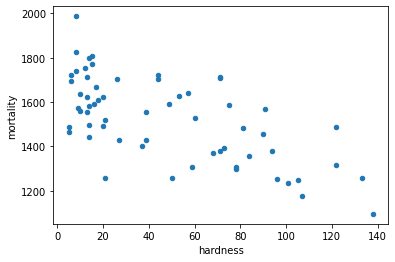

In [ ]:
# визуализируем взаимосвязь между смертностью и жеткостью воды до поиска выбросов
df.plot(kind='scatter', x='hardness', y='mortality')

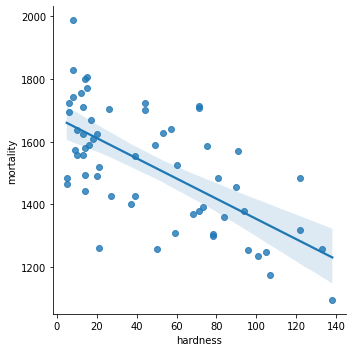

In [ ]:
sns.lmplot(x='hardness',
           y='mortality',
           data=df);

Слабая обратная связь.

Глядя на эту визуализацию, можно подумать, что отсутствие кальция в воде плохо воздействует на здоровье людей (здесь, на жизнеспособность).

Но здесь нет данных про возврстную категорию людей. Возможно сюда попали городки, где живут только пенсионеры. И их смертность и есть вся статистика этих городков.

In [ ]:
# считаем коэф. корреляции 
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# IQR
Q1_mort = df['mortality'].quantile(0.25)
Q3_mort = df['mortality'].quantile(0.75)
IQR_mort = Q3_mort - Q1_mort
IQR_mort

289.0

In [ ]:
# Диапазон, куда выбросы НЕ входят
lower_bound_mort = Q1_mort - (1.5 * IQR_mort) 
upper_bound_mort = Q3_mort + (1.5 * IQR_mort)

In [ ]:
# Есть ли эти самые выбросы?
print(len(df[~df['mortality'].between(lower_bound_mort, upper_bound_mort, inclusive=True)]))

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


Выбросов нет. Значит, всё корректно. Выбросы не искажают линейную связь

In [ ]:
# считаем коэф. корреляции Спирмана
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
# считаем коэф. корреляции Кенделла
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Коэф. корреляции Спирмана и Кенелла точно также показывают слабую обратную связь 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['hardness']]
y = df['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape

(51, 1)

In [ ]:
y_train.shape

(51,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_

array([-3.28204413])

In [ ]:
model.intercept_

1681.6276209577732

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1337.01298764, 1648.80717969, 1635.67900318, 1537.21767938,
       1425.62817906, 1615.98673842, 1245.11575209, 1435.47431145,
       1612.70469429, 1661.9353562 ])

In [ ]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
Name: mortality, dtype: int64

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.583655258547394

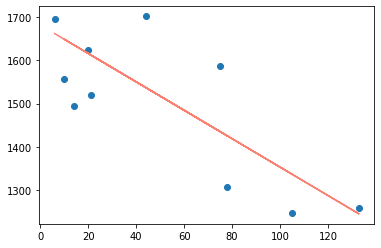

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='salmon')

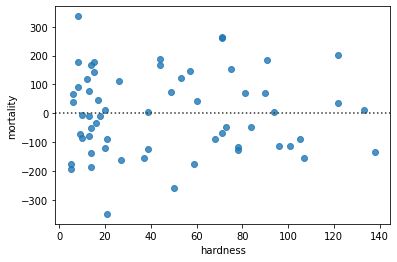

In [ ]:
sns.residplot(x='hardness',
              y='mortality',
              data = df);

При разделении датасета данных просто остается очень мало для построения адекватной модели, это как раз и видно по коэффициентам детерминации (мы тут не можем с уверенностью судить о наличии/отсутствии взаимосвязи).

[Материал для более подробного изучения графиков остатков](http://www.machinelearning.ru/wiki/index.php?title=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D1%81%D1%82%D0%B0%D1%82%D0%BA%D0%BE%D0%B2_(%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80)), **здесь он построен верно через residplot**.

А вот эти материалы пригодятся для понимания оптимизации моделей и дальнейшего погружения в тему:

https://blog.quantinsti.com/linear-regression-models-scikit-learn/

http://pavelbazin.com/post/linear-regression-hyperparameters/

###Задание 2. Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
# Разделение на северные и южные города

In [ ]:
south = df.loc[df.location == 'South']
south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [ ]:
north = df.loc[df.location == 'North']
north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


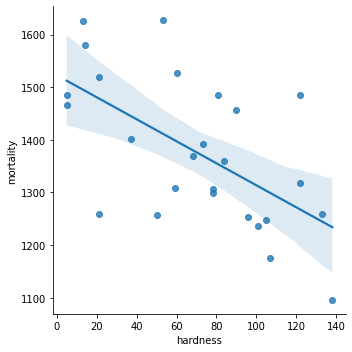

In [ ]:
# визуализируем взаимосвязь между смертностью и жеткостью воды в южных городах
sns.lmplot(x='hardness',
           y='mortality',
           data=south);

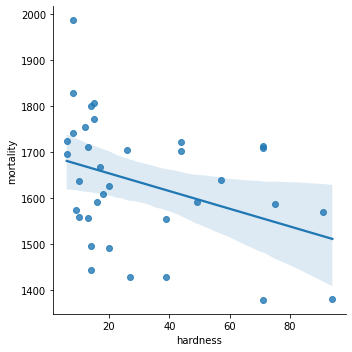

In [ ]:
# визуализируем взаимосвязь между смертностью и жеткостью воды в северных городах
sns.lmplot(x='hardness',
           y='mortality',
           data=north);

In [ ]:
# считаем коэф. корреляции Спирмана
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


В северных городах связь между жесткостью воды и смертностью слабее, чем в южных. Связь обратная.

Кроме этого на визуализации видно, что в северных городах вода склонна быть некальцинированной либо малокальцинированной (елси можно так выразиться). В южных городах доля кальция в воде варьирует, т.е. есть города с жесткой водой, есть города с малокальцинированной водой.  

In [ ]:
# считаем коэф. корреляции Кенделла
south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [ ]:
# считаем коэф. корреляции Кенделла
north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [ ]:
#Южные города

In [ ]:
X_s = south[['hardness']]
y_s = south['mortality']

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.15, random_state=12)

In [ ]:
X_train_s.shape

(22, 1)

In [ ]:
y_train_s.shape

(22,)

In [ ]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model_s.coef_

array([-2.24040982])

In [ ]:
model_s.intercept_

1546.5660758247805

In [ ]:
y_pred_s = model_s.predict(X_test_s)
y_pred_s

array([1434.54558466, 1331.48673279, 1394.21820784, 1535.36402671])

In [ ]:
y_test_s

48    1257
14    1254
47    1369
2     1466
Name: mortality, dtype: int64

In [ ]:
model_s.score(X_test_s, y_test_s) # метод возвращает значение коэффициента детерминации

-0.3883615351865499

Моя модель хуже, если б я считала по среднему)) 

Возможные причины этого:
* я плохо подобрала модель
* здесь совсем не линейная связь 
* у меня очень мало данных для обучения -- в точку!))

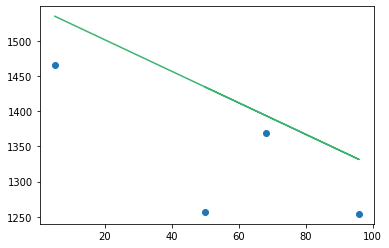

In [ ]:
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='mediumseagreen')

In [ ]:
#Северные города

In [ ]:
X_n = north[['hardness']]
y_n = north['mortality']

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.15, random_state=42)

In [ ]:
X_train_n.shape

(29, 1)

In [ ]:
y_train_n.shape

(29,)

In [ ]:
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model_n.coef_

array([-2.1870977])

In [ ]:
model_n.intercept_

1696.5128220604054

In [ ]:
y_pred_n = model_n.predict(X_test_n)
y_pred_n

array([1679.01604045, 1676.82894274, 1665.89345423, 1683.39023585,
       1661.51925883, 1541.22888523])

In [ ]:
model_n.score(X_test_n, y_test_n) # метод возвращает значение коэффициента детерминации

-0.11081361475476226

Тоже самое: моя модель хуже прогнозирует, чем если б я считала по среднему))

Возможные причины этого:

* я плохо подобрала модель
* здесь совсем не линейная связь
* у меня очень мало данных для обучения -- в точку!))

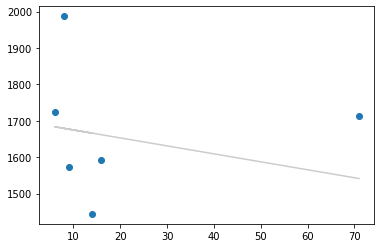

In [ ]:
plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c='0.8')

#Полезные ссылки

[Colab с занятия](https://colab.research.google.com/drive/1NA8IFqmjnhOZi5OSZo2EvaOeX8SLxDAC)


[How to Load Kaggle Datasets Directly into Google Colab?](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

[Colors](https://matplotlib.org/stable/tutorials/colors/colors.html)

[Визуализация регрессионных моделей](https://pyprog.pro/sns/sns_8_regression_models.html)


[Python – seaborn.residplot() method](https://www.geeksforgeeks.org/python-seaborn-residplot-method/)

https://www.youtube.com/watch?v=v1kMoh2IAmY

https://www.youtube.com/watch?v=w9IGkBfOoic